In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [9]:
df= pd.read_csv('data_after_feature_engineering_2.csv')

In [10]:
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Min,Arrival_hour,Arrival_minute,Airline_Original,Source_Original,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,IndiGo,Banglore,...,False,False,False,False,False,False,False,True,2,50
1,2,7662,1,5,5,50,13,15,Air India,Kolkata,...,False,True,False,False,False,False,False,False,7,25
2,2,13882,9,6,9,25,4,25,Jet Airways,Delhi,...,True,False,False,True,False,False,False,False,19,0
3,1,6218,12,5,18,5,23,30,IndiGo,Kolkata,...,False,True,False,False,False,False,False,False,5,25
4,1,13302,1,3,16,50,21,35,IndiGo,Banglore,...,False,False,False,False,False,False,False,True,4,45


In [11]:
df.drop(['Source_Original','Destination_Original','Airline_Original'],axis=1,inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

# Make sure X and y are correctly defined
X = df.drop("Price", axis=1)
y = df["Price"]

# Always split them together
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(x_train.shape, y_train.shape)


(8545, 29) (8545,)


In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

In [14]:
xgb = XGBRFRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

In [15]:
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² Score (XGB):", r2_score(y_test, y_pred_xgb))
print("R² Score (LR):", r2_score(y_test, y_pred_lr))

Linear Regression MAE: 1972.9241585981356
XGBoost MAE: 1659.3179931640625
R² Score (XGB): 0.7267284393310547
R² Score (LR): 0.6195911867006523


Text(0.5, 1.0, 'Top Features Influencing Price')

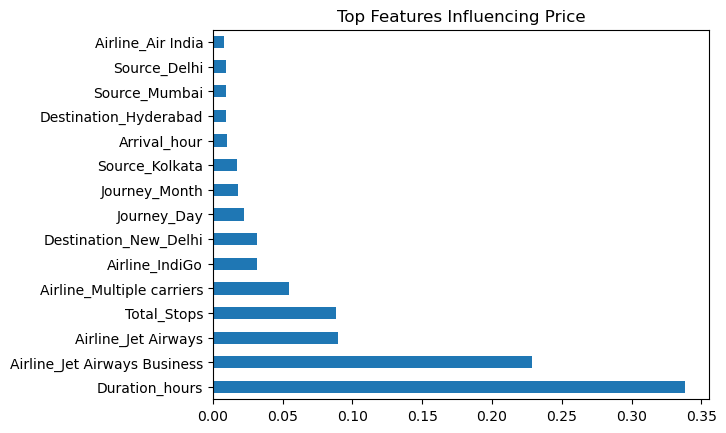

In [16]:
feature_importance = pd.Series(xgb.feature_importances_, index=X.columns)
feature_importance.nlargest(15).plot(kind='barh')
plt.title("Top Features Influencing Price")


In [17]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}


In [18]:
import pickle

with open("model/xgb_model.pkl", "wb") as file:
    pickle.dump(xgb, file)


In [20]:
import pickle

# Save feature names used in training
with open("feature_names.pkl", "wb") as f:
    pickle.dump(list(x_train.columns), f)

# Save the trained model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)


In [ ]:
!streamlit run app2.py